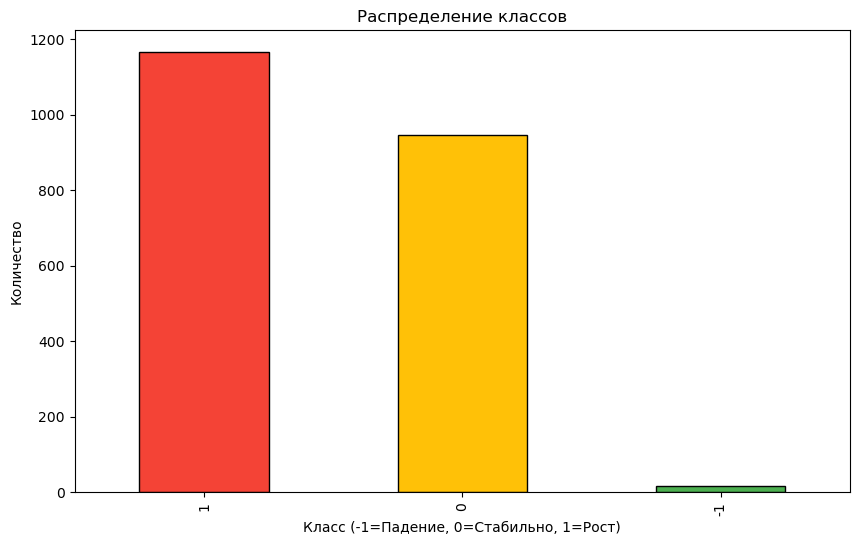

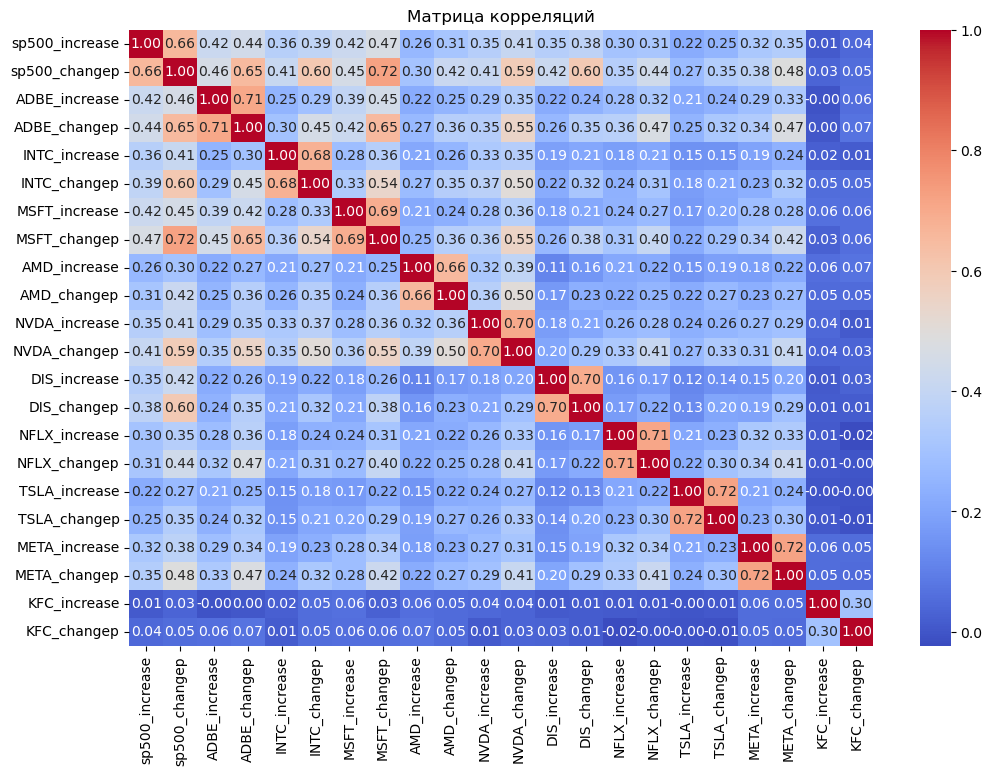

Лучшие параметры: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       0.78      0.75      0.77       190
           1       0.81      0.79      0.80       233

    accuracy                           0.77       426
   macro avg       0.53      0.51      0.52       426
weighted avg       0.79      0.77      0.78       426



<Figure size 800x600 with 0 Axes>

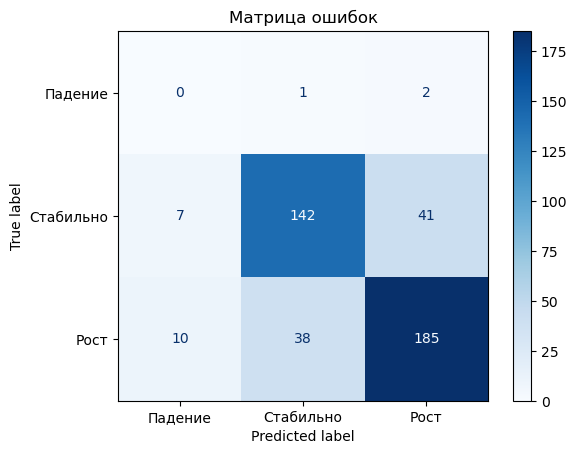

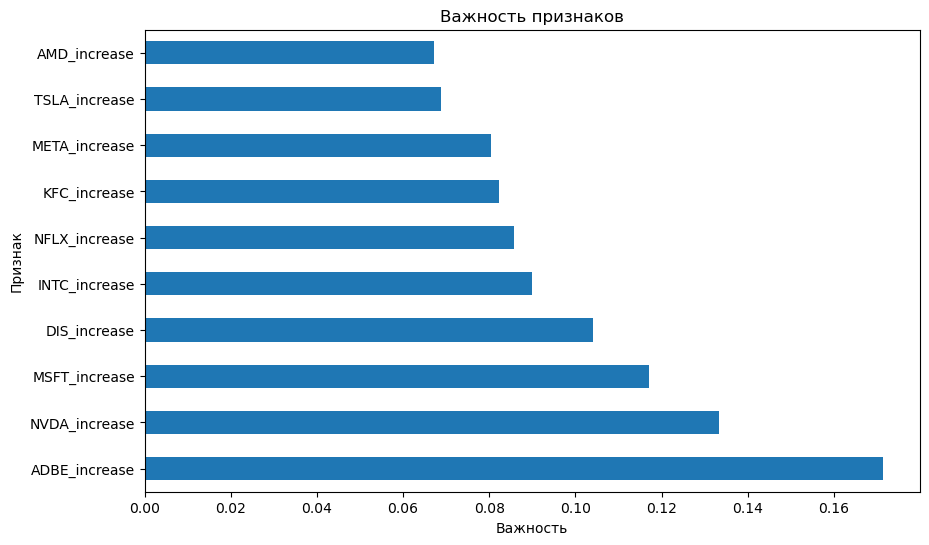

['scaler.pkl']

In [1]:
# %% [markdown]
# # S&P 500 Movement Prediction
# ## Анализ и прогнозирование движения индекса

# %% [markdown]
# ### 1. Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# %% [markdown]
# ### 2. Загрузка данных
df = pd.read_csv('sp500_stocks.csv', parse_dates=['Date'])
df = df.sort_values('Date').drop(columns=['Unnamed: 0'], errors='ignore')

# %% [markdown]
# ### 3. Разведовательный анализ (EDA)
# %%
# Распределение целевой переменной
plt.figure(figsize=(10,6))
df['sp500_increase'].value_counts().plot.bar(
    color=['#F44336', '#FFC107', '#4CAF50'],
    edgecolor='black'
)
plt.title('Распределение классов')
plt.xlabel('Класс (-1=Падение, 0=Стабильно, 1=Рост)')
plt.ylabel('Количество')
plt.show()

# %%
# Матрица корреляций
plt.figure(figsize=(12,8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

# %% [markdown]
# ### 4. Предобработка данных
# %%
features = ['ADBE_increase', 'INTC_increase', 'MSFT_increase', 
           'AMD_increase', 'NVDA_increase', 'DIS_increase',
           'NFLX_increase', 'TSLA_increase', 'META_increase', 
           'KFC_increase']

X = df[features]
y = df['sp500_increase']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# %% [markdown]
# ### 5. Обучение модели
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# %%
# Настройка гиперпараметров
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(class_weight='balanced')
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# %%
# Лучшая модель
best_model = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")

# %% [markdown]
# ### 6. Оценка модели
# %%
y_pred = best_model.predict(X_test)

# %%
print(classification_report(y_test, y_pred))

# %%
# Матрица ошибок
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Падение', 'Стабильно', 'Рост'])
disp.plot(cmap='Blues')
plt.title('Матрица ошибок')
plt.show()

# %%
# Важность признаков
plt.figure(figsize=(10,6))
(pd.Series(best_model.feature_importances_, index=features)
 .nlargest(10)
 .plot(kind='barh'))
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

# %% [markdown]
# ### 7. Сохранение модели
# %%
joblib.dump(best_model, 'sp500_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

In [3]:
# %% [markdown]
# # S&P 500 Index Movement Prediction
# ## Financial Market Analysis and Forecasting System

# %% [markdown]
# ### 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
%matplotlib inline

# %% [markdown]
# ### 2. Load Dataset
# %%
try:
    df = pd.read_csv('../data/sp500_stocks.csv', parse_dates=['Date'])
    df = df.sort_values('Date').drop(columns=['Unnamed: 0'], errors='ignore')
    print("✅ Data loaded successfully")
    print(f"Dataset shape: {df.shape}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
except Exception as e:
    print(f"❌ Error loading data: {str(e)}")

# %% [markdown]
# ### 3. Exploratory Data Analysis (EDA)
# %% [markdown]
# #### 3.1 Class Distribution
# %%
plt.figure(figsize=(10,6))
ax = df['sp500_increase'].value_counts().sort_index().plot.bar(
    color=['#e74c3c', '#f1c40f', '#2ecc71'],
    edgecolor='black'
)
plt.title('S&P 500 Movement Class Distribution', fontsize=14)
plt.xlabel('Movement Class (-1=Decline, 0=Stable, 1=Growth)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig('../images/class_distribution.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 3.2 Correlation Analysis
# %%
plt.figure(figsize=(14,10))
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
           linewidths=0.5, annot_kws={"size": 10})
plt.title('Feature Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/correlation_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 4. Data Preprocessing
# %%
features = [
    'ADBE_increase', 'INTC_increase', 'MSFT_increase',
    'AMD_increase', 'NVDA_increase', 'DIS_increase',
    'NFLX_increase', 'TSLA_increase', 'META_increase',
    'KFC_increase'
]

X = df[features]
y = df['sp500_increase']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# %% [markdown]
# ### 5. Model Training
# %% [markdown]
# #### 5.1 Train-Test Split
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# %% [markdown]
# #### 5.2 Hyperparameter Tuning
# %%
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# %% [markdown]
# #### 5.3 Best Model Selection
# %%
best_model = grid_search.best_estimator_
print("🔥 Best Model Parameters:")
print(grid_search.best_params_)

# %% [markdown]
# ### 6. Model Evaluation
# %% [markdown]
# #### 6.1 Classification Report
# %%
y_pred = best_model.predict(X_test)
print("📊 Classification Performance:")
print(classification_report(y_test, y_pred, target_names=['Decline', 'Stable', 'Growth']))

# %% [markdown]
# #### 6.2 Confusion Matrix
# %%
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Decline', 'Stable', 'Growth'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix', fontsize=14)
plt.savefig('../images/confusion_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 6.3 Feature Importance
# %%
plt.figure(figsize=(12,8))
feature_importance = pd.Series(best_model.feature_importances_, index=features)
feature_importance.nlargest(10).sort_values().plot(kind='barh', color='#3498db')
plt.title('Top 10 Important Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.savefig('../images/feature_importance.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 7. Model Deployment
# %%
joblib.dump(best_model, '../models/sp500_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
print("💾 Model artifacts saved successfully")

# %% [markdown]
# ### 8. Unit Tests
# %%
def test_model_loading():
    try:
        model = joblib.load('../models/sp500_model.pkl')
        scaler = joblib.load('../models/scaler.pkl')
        assert model is not None and scaler is not None
        print("✅ Model loading test passed")
    except Exception as e:
        print(f"❌ Model loading test failed: {str(e)}")

def test_prediction():
    sample_data = {feature: 0.0 for feature in features}
    sample_data['NVDA_increase'] = 0.05
    try:
        model = joblib.load('../models/sp500_model.pkl')
        scaler = joblib.load('../models/scaler.pkl')
        scaled_data = scaler.transform(pd.DataFrame([sample_data]))
        prediction = model.predict(scaled_data)
        assert prediction[0] in [-1, 0, 1]
        print("✅ Prediction test passed")
    except Exception as e:
        print(f"❌ Prediction test failed: {str(e)}")

# Run tests
test_model_loading()
test_prediction()

❌ Error loading data: [Errno 2] No such file or directory: '../data/sp500_stocks.csv'


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ihorkorolov/PycharmProjects/images/class_distribution.png'

In [5]:
# %% [markdown]
# # S&P 500 Index Movement Prediction
# ## Financial Market Analysis and Forecasting System

# %% [markdown]
# ### 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
%matplotlib inline

# %% [markdown]
# ### 2. Load Dataset
# %%
try:
    df = pd.read_csv('../data/sp500_stocks.csv', parse_dates=['Date'])
    df = df.sort_values('Date').drop(columns=['Unnamed: 0'], errors='ignore')
    print("✅ Data loaded successfully")
    print(f"Dataset shape: {df.shape}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
except Exception as e:
    print(f"❌ Error loading data: {str(e)}")

# %% [markdown]
# ### 3. Exploratory Data Analysis (EDA)
# %% [markdown]
# #### 3.1 Class Distribution
# %%
plt.figure(figsize=(10,6))
ax = df['sp500_increase'].value_counts().sort_index().plot.bar(
    color=['#e74c3c', '#f1c40f', '#2ecc71'],
    edgecolor='black'
)
plt.title('S&P 500 Movement Class Distribution', fontsize=14)
plt.xlabel('Movement Class (-1=Decline, 0=Stable, 1=Growth)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig('../images/class_distribution.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 3.2 Correlation Analysis
# %%
plt.figure(figsize=(14,10))
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
           linewidths=0.5, annot_kws={"size": 10})
plt.title('Feature Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/correlation_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 4. Data Preprocessing
# %%
features = [
    'ADBE_increase', 'INTC_increase', 'MSFT_increase',
    'AMD_increase', 'NVDA_increase', 'DIS_increase',
    'NFLX_increase', 'TSLA_increase', 'META_increase',
    'KFC_increase'
]

X = df[features]
y = df['sp500_increase']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# %% [markdown]
# ### 5. Model Training
# %% [markdown]
# #### 5.1 Train-Test Split
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# %% [markdown]
# #### 5.2 Hyperparameter Tuning
# %%
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# %% [markdown]
# #### 5.3 Best Model Selection
# %%
best_model = grid_search.best_estimator_
print("🔥 Best Model Parameters:")
print(grid_search.best_params_)

# %% [markdown]
# ### 6. Model Evaluation
# %% [markdown]
# #### 6.1 Classification Report
# %%
y_pred = best_model.predict(X_test)
print("📊 Classification Performance:")
print(classification_report(y_test, y_pred, target_names=['Decline', 'Stable', 'Growth']))

# %% [markdown]
# #### 6.2 Confusion Matrix
# %%
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Decline', 'Stable', 'Growth'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix', fontsize=14)
plt.savefig('../images/confusion_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 6.3 Feature Importance
# %%
plt.figure(figsize=(12,8))
feature_importance = pd.Series(best_model.feature_importances_, index=features)
feature_importance.nlargest(10).sort_values().plot(kind='barh', color='#3498db')
plt.title('Top 10 Important Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.savefig('../images/feature_importance.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 7. Model Deployment
# %%
joblib.dump(best_model, '../models/sp500_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
print("💾 Model artifacts saved successfully")

# %% [markdown]
# ### 8. Unit Tests
# %%
def test_model_loading():
    try:
        model = joblib.load('../models/sp500_model.pkl')
        scaler = joblib.load('../models/scaler.pkl')
        assert model is not None and scaler is not None
        print("✅ Model loading test passed")
    except Exception as e:
        print(f"❌ Model loading test failed: {str(e)}")

def test_prediction():
    sample_data = {feature: 0.0 for feature in features}
    sample_data['NVDA_increase'] = 0.05
    try:
        model = joblib.load('../models/sp500_model.pkl')
        scaler = joblib.load('../models/scaler.pkl')
        scaled_data = scaler.transform(pd.DataFrame([sample_data]))
        prediction = model.predict(scaled_data)
        assert prediction[0] in [-1, 0, 1]
        print("✅ Prediction test passed")
    except Exception as e:
        print(f"❌ Prediction test failed: {str(e)}")

# Run tests
test_model_loading()
test_prediction()

❌ Error loading data: [Errno 2] No such file or directory: '../data/sp500_stocks.csv'


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ihorkorolov/PycharmProjects/images/class_distribution.png'

In [10]:
# %% [markdown]
# # S&P 500 Index Movement Prediction
# ## Financial Market Analysis and Forecasting System

# %% [markdown]
# ### 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
%matplotlib inline

# %% [markdown]
# ### 2. Load Dataset
# %%
try:
    df = pd.read_csv('../data/sp500_stocks.csv', parse_dates=['Date'])
    df = df.sort_values('Date').drop(columns=['Unnamed: 0'], errors='ignore')
    print("✅ Data loaded successfully")
    print(f"Dataset shape: {df.shape}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
except Exception as e:
    print(f"❌ Error loading data: {str(e)}")

# %% [markdown]
# ### 3. Exploratory Data Analysis (EDA)
# %% [markdown]
# #### 3.1 Class Distribution
# %%
plt.figure(figsize=(10,6))
ax = df['sp500_increase'].value_counts().sort_index().plot.bar(
    color=['#e74c3c', '#f1c40f', '#2ecc71'],
    edgecolor='black'
)
plt.title('S&P 500 Movement Class Distribution', fontsize=14)
plt.xlabel('Movement Class (-1=Decline, 0=Stable, 1=Growth)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig('../images/class_distribution.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 3.2 Correlation Analysis
# %%
plt.figure(figsize=(14,10))
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
           linewidths=0.5, annot_kws={"size": 10})
plt.title('Feature Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/correlation_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 4. Data Preprocessing
# %%
features = [
    'ADBE_increase', 'INTC_increase', 'MSFT_increase',
    'AMD_increase', 'NVDA_increase', 'DIS_increase',
    'NFLX_increase', 'TSLA_increase', 'META_increase',
    'KFC_increase'
]

X = df[features]
y = df['sp500_increase']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# %% [markdown]
# ### 5. Model Training
# %% [markdown]
# #### 5.1 Train-Test Split
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# %% [markdown]
# #### 5.2 Hyperparameter Tuning
# %%
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# %% [markdown]
# #### 5.3 Best Model Selection
# %%
best_model = grid_search.best_estimator_
print("🔥 Best Model Parameters:")
print(grid_search.best_params_)

# %% [markdown]
# ### 6. Model Evaluation
# %% [markdown]
# #### 6.1 Classification Report
# %%
y_pred = best_model.predict(X_test)
print("📊 Classification Performance:")
print(classification_report(y_test, y_pred, target_names=['Decline', 'Stable', 'Growth']))

# %% [markdown]
# #### 6.2 Confusion Matrix
# %%
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Decline', 'Stable', 'Growth'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix', fontsize=14)
plt.savefig('../images/confusion_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 6.3 Feature Importance
# %%
plt.figure(figsize=(12,8))
feature_importance = pd.Series(best_model.feature_importances_, index=features)
feature_importance.nlargest(10).sort_values().plot(kind='barh', color='#3498db')
plt.title('Top 10 Important Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.savefig('../images/feature_importance.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 7. Model Deployment
# %%
joblib.dump(best_model, '../models/sp500_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
print("💾 Model artifacts saved successfully")

# %% [markdown]
# ### 8. Unit Tests
# %%
def test_model_loading():
    try:
        model = joblib.load('../models/sp500_model.pkl')
        scaler = joblib.load('../models/scaler.pkl')
        assert model is not None and scaler is not None
        print("✅ Model loading test passed")
    except Exception as e:
        print(f"❌ Model loading test failed: {str(e)}")

def test_prediction():
    sample_data = {feature: 0.0 for feature in features}
    sample_data['NVDA_increase'] = 0.05
    try:
        model = joblib.load('../models/sp500_model.pkl')
        scaler = joblib.load('../models/scaler.pkl')
        scaled_data = scaler.transform(pd.DataFrame([sample_data]))
        prediction = model.predict(scaled_data)
        assert prediction[0] in [-1, 0, 1]
        print("✅ Prediction test passed")
    except Exception as e:
        print(f"❌ Prediction test failed: {str(e)}")

# Run tests
test_model_loading()
test_prediction()

❌ Error loading data: [Errno 2] No such file or directory: '../data/sp500_stocks.csv'


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ihorkorolov/PycharmProjects/images/class_distribution.png'

In [12]:
# %% [markdown]
# # S&P 500 Index Movement Prediction
# ## Financial Market Analysis and Forecasting System

# %% [markdown]
# ### 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
%matplotlib inline

# %% [markdown]
# ### 2. Load Dataset
# %%
try:
    df = pd.read_csv('../data/sp500_stocks.csv', parse_dates=['Date'])
    df = df.sort_values('Date').drop(columns=['Unnamed: 0'], errors='ignore')
    print("✅ Data loaded successfully")
    print(f"Dataset shape: {df.shape}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
except Exception as e:
    print(f"❌ Error loading data: {str(e)}")

# %% [markdown]
# ### 3. Exploratory Data Analysis (EDA)
# %% [markdown]
# #### 3.1 Class Distribution
# %%
plt.figure(figsize=(10,6))
ax = df['sp500_increase'].value_counts().sort_index().plot.bar(
    color=['#e74c3c', '#f1c40f', '#2ecc71'],
    edgecolor='black'
)
plt.title('S&P 500 Movement Class Distribution', fontsize=14)
plt.xlabel('Movement Class (-1=Decline, 0=Stable, 1=Growth)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig('../images/class_distribution.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 3.2 Correlation Analysis
# %%
plt.figure(figsize=(14,10))
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
           linewidths=0.5, annot_kws={"size": 10})
plt.title('Feature Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/correlation_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 4. Data Preprocessing
# %%
features = [
    'ADBE_increase', 'INTC_increase', 'MSFT_increase',
    'AMD_increase', 'NVDA_increase', 'DIS_increase',
    'NFLX_increase', 'TSLA_increase', 'META_increase',
    'KFC_increase'
]

X = df[features]
y = df['sp500_increase']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# %% [markdown]
# ### 5. Model Training
# %% [markdown]
# #### 5.1 Train-Test Split
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# %% [markdown]
# #### 5.2 Hyperparameter Tuning
# %%
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# %% [markdown]
# #### 5.3 Best Model Selection
# %%
best_model = grid_search.best_estimator_
print("🔥 Best Model Parameters:")
print(grid_search.best_params_)

# %% [markdown]
# ### 6. Model Evaluation
# %% [markdown]
# #### 6.1 Classification Report
# %%
y_pred = best_model.predict(X_test)
print("📊 Classification Performance:")
print(classification_report(y_test, y_pred, target_names=['Decline', 'Stable', 'Growth']))

# %% [markdown]
# #### 6.2 Confusion Matrix
# %%
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Decline', 'Stable', 'Growth'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix', fontsize=14)
plt.savefig('../images/confusion_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 6.3 Feature Importance
# %%
plt.figure(figsize=(12,8))
feature_importance = pd.Series(best_model.feature_importances_, index=features)
feature_importance.nlargest(10).sort_values().plot(kind='barh', color='#3498db')
plt.title('Top 10 Important Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.savefig('../images/feature_importance.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 7. Model Deployment
# %%
joblib.dump(best_model, '../models/sp500_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')
print("💾 Model artifacts saved successfully")

# %% [markdown]
# ### 8. Unit Tests
# %%
def test_model_loading():
    try:
        model = joblib.load('../models/sp500_model.pkl')
        scaler = joblib.load('../models/scaler.pkl')
        assert model is not None and scaler is not None
        print("✅ Model loading test passed")
    except Exception as e:
        print(f"❌ Model loading test failed: {str(e)}")

def test_prediction():
    sample_data = {feature: 0.0 for feature in features}
    sample_data['NVDA_increase'] = 0.05
    try:
        model = joblib.load('../models/sp500_model.pkl')
        scaler = joblib.load('../models/scaler.pkl')
        scaled_data = scaler.transform(pd.DataFrame([sample_data]))
        prediction = model.predict(scaled_data)
        assert prediction[0] in [-1, 0, 1]
        print("✅ Prediction test passed")
    except Exception as e:
        print(f"❌ Prediction test failed: {str(e)}")

# Run tests
test_model_loading()
test_prediction()

❌ Error loading data: [Errno 2] No such file or directory: '../data/sp500_stocks.csv'


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ihorkorolov/PycharmProjects/images/class_distribution.png'

In [14]:
# %% [markdown]
# # S&P 500 Index Movement Prediction
# ## Financial Market Analysis and Forecasting System

# %% [markdown]
# ### 0. Initial Setup
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Create necessary directories
BASE_DIR = pathlib.Path().resolve().parent
DATA_DIR = BASE_DIR / 'data'
IMAGES_DIR = BASE_DIR / 'images'
MODELS_DIR = BASE_DIR / 'models'

DATA_DIR.mkdir(exist_ok=True)
IMAGES_DIR.mkdir(exist_ok=True)
MODELS_DIR.mkdir(exist_ok=True)

print("🛠 Project structure verification:")
print(f"Working directory: {BASE_DIR}")
print(f"Data path: {DATA_DIR}")
print(f"Images path: {IMAGES_DIR}")
print(f"Models path: {MODELS_DIR}\n")

# %% [markdown]
# ### 1. Load Dataset
# %%
try:
    data_path = DATA_DIR / 'sp500_stocks.csv'
    if not data_path.exists():
        raise FileNotFoundError(f"Data file not found at {data_path}")
    
    df = pd.read_csv(data_path, parse_dates=['Date'])
    df = df.sort_values('Date').drop(columns=['Unnamed: 0'], errors='ignore')
    print("✅ Data loaded successfully")
    print(f"Dataset shape: {df.shape}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
except Exception as e:
    print(f"❌ Error loading data: {str(e)}")
    raise

# %% [markdown]
# ### 2. Exploratory Data Analysis (EDA)
# %% [markdown]
# #### 2.1 Class Distribution
# %%
plt.figure(figsize=(10,6))
ax = df['sp500_increase'].value_counts().sort_index().plot.bar(
    color=['#e74c3c', '#f1c40f', '#2ecc71'],
    edgecolor='black'
)
plt.title('S&P 500 Movement Class Distribution', fontsize=14)
plt.xlabel('Movement Class (-1=Decline, 0=Stable, 1=Growth)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig(IMAGES_DIR / 'class_distribution.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 2.2 Correlation Analysis
# %%
plt.figure(figsize=(14,10))
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
           linewidths=0.5, annot_kws={"size": 10})
plt.title('Feature Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig(IMAGES_DIR / 'correlation_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 3. Data Preprocessing
# %%
features = [
    'ADBE_increase', 'INTC_increase', 'MSFT_increase',
    'AMD_increase', 'NVDA_increase', 'DIS_increase',
    'NFLX_increase', 'TSLA_increase', 'META_increase',
    'KFC_increase'
]

X = df[features]
y = df['sp500_increase']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# %% [markdown]
# ### 4. Model Training
# %% [markdown]
# #### 4.1 Train-Test Split
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# %% [markdown]
# #### 4.2 Hyperparameter Tuning
# %%
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# %% [markdown]
# #### 4.3 Best Model Selection
# %%
best_model = grid_search.best_estimator_
print("🔥 Best Model Parameters:")
print(grid_search.best_params_)

# %% [markdown]
# ### 5. Model Evaluation
# %% [markdown]
# #### 5.1 Classification Report
# %%
y_pred = best_model.predict(X_test)
print("📊 Classification Performance:")
print(classification_report(y_test, y_pred, target_names=['Decline', 'Stable', 'Growth']))

# %% [markdown]
# #### 5.2 Confusion Matrix
# %%
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Decline', 'Stable', 'Growth'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix', fontsize=14)
plt.savefig(IMAGES_DIR / 'confusion_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 5.3 Feature Importance
# %%
plt.figure(figsize=(12,8))
feature_importance = pd.Series(best_model.feature_importances_, index=features)
feature_importance.nlargest(10).sort_values().plot(kind='barh', color='#3498db')
plt.title('Top 10 Important Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.savefig(IMAGES_DIR / 'feature_importance.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 6. Model Deployment
# %%
joblib.dump(best_model, MODELS_DIR / 'sp500_model.pkl')
joblib.dump(scaler, MODELS_DIR / 'scaler.pkl')
print("💾 Model artifacts saved successfully")

# %% [markdown]
# ### 7. Unit Tests
# %%
def test_model_loading():
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        assert model is not None and scaler is not None
        print("✅ Model loading test passed")
    except Exception as e:
        print(f"❌ Model loading test failed: {str(e)}")

def test_prediction():
    sample_data = {feature: 0.0 for feature in features}
    sample_data['NVDA_increase'] = 0.05
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        scaled_data = scaler.transform(pd.DataFrame([sample_data]))
        prediction = model.predict(scaled_data)
        assert prediction[0] in [-1, 0, 1]
        print("✅ Prediction test passed")
    except Exception as e:
        print(f"❌ Prediction test failed: {str(e)}")

# Run tests
test_model_loading()
test_prediction()

🛠 Project structure verification:
Working directory: /Users/ihorkorolov/PycharmProjects
Data path: /Users/ihorkorolov/PycharmProjects/data
Images path: /Users/ihorkorolov/PycharmProjects/images
Models path: /Users/ihorkorolov/PycharmProjects/models

❌ Error loading data: Data file not found at /Users/ihorkorolov/PycharmProjects/data/sp500_stocks.csv


FileNotFoundError: Data file not found at /Users/ihorkorolov/PycharmProjects/data/sp500_stocks.csv

In [16]:
# %% [markdown]
# # S&P 500 Index Movement Prediction
# ## Financial Market Analysis and Forecasting System

# %% [markdown]
# ### 0. Initial Setup
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Create necessary directories
BASE_DIR = pathlib.Path().resolve().parent
DATA_DIR = BASE_DIR / 'data'
IMAGES_DIR = BASE_DIR / 'images'
MODELS_DIR = BASE_DIR / 'models'

DATA_DIR.mkdir(exist_ok=True)
IMAGES_DIR.mkdir(exist_ok=True)
MODELS_DIR.mkdir(exist_ok=True)

print("🛠 Project structure verification:")
print(f"Working directory: {BASE_DIR}")
print(f"Data path: {DATA_DIR}")
print(f"Images path: {IMAGES_DIR}")
print(f"Models path: {MODELS_DIR}\n")

# %% [markdown]
# ### 1. Load Dataset
# %%
try:
    # Убедитесь в правильности базового пути
    BASE_DIR = pathlib.Path('/Users/ihorkorolov/PycharmProjects/')
    DATA_DIR = BASE_DIR / 'data'
    
    data_path = DATA_DIR / 'sp500_stocks.csv'
    
    if not data_path.exists():
        print(f"❌ Файл не найден! Проверьте путь: {data_path}")
        print("Создайте папку и файл через:")
        print(f"mkdir -p {DATA_DIR}")
        print(f"curl -o {data_path} https://ваш_источник_данных/sp500_stocks.csv")
        raise FileNotFoundError("Требуемый файл данных отсутствует")
    
    df = pd.read_csv(data_path, parse_dates=['Date'])

# %% [markdown]
# ### 2. Exploratory Data Analysis (EDA)
# %% [markdown]
# #### 2.1 Class Distribution
# %%
plt.figure(figsize=(10,6))
ax = df['sp500_increase'].value_counts().sort_index().plot.bar(
    color=['#e74c3c', '#f1c40f', '#2ecc71'],
    edgecolor='black'
)
plt.title('S&P 500 Movement Class Distribution', fontsize=14)
plt.xlabel('Movement Class (-1=Decline, 0=Stable, 1=Growth)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], label_type='edge')
plt.savefig(IMAGES_DIR / 'class_distribution.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 2.2 Correlation Analysis
# %%
plt.figure(figsize=(14,10))
corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
           linewidths=0.5, annot_kws={"size": 10})
plt.title('Feature Correlation Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig(IMAGES_DIR / 'correlation_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 3. Data Preprocessing
# %%
features = [
    'ADBE_increase', 'INTC_increase', 'MSFT_increase',
    'AMD_increase', 'NVDA_increase', 'DIS_increase',
    'NFLX_increase', 'TSLA_increase', 'META_increase',
    'KFC_increase'
]

X = df[features]
y = df['sp500_increase']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# %% [markdown]
# ### 4. Model Training
# %% [markdown]
# #### 4.1 Train-Test Split
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# %% [markdown]
# #### 4.2 Hyperparameter Tuning
# %%
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# %% [markdown]
# #### 4.3 Best Model Selection
# %%
best_model = grid_search.best_estimator_
print("🔥 Best Model Parameters:")
print(grid_search.best_params_)

# %% [markdown]
# ### 5. Model Evaluation
# %% [markdown]
# #### 5.1 Classification Report
# %%
y_pred = best_model.predict(X_test)
print("📊 Classification Performance:")
print(classification_report(y_test, y_pred, target_names=['Decline', 'Stable', 'Growth']))

# %% [markdown]
# #### 5.2 Confusion Matrix
# %%
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Decline', 'Stable', 'Growth'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix', fontsize=14)
plt.savefig(IMAGES_DIR / 'confusion_matrix.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# #### 5.3 Feature Importance
# %%
plt.figure(figsize=(12,8))
feature_importance = pd.Series(best_model.feature_importances_, index=features)
feature_importance.nlargest(10).sort_values().plot(kind='barh', color='#3498db')
plt.title('Top 10 Important Features', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.savefig(IMAGES_DIR / 'feature_importance.png', bbox_inches='tight')
plt.show()

# %% [markdown]
# ### 6. Model Deployment
# %%
joblib.dump(best_model, MODELS_DIR / 'sp500_model.pkl')
joblib.dump(scaler, MODELS_DIR / 'scaler.pkl')
print("💾 Model artifacts saved successfully")

# %% [markdown]
# ### 7. Unit Tests
# %%
def test_model_loading():
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        assert model is not None and scaler is not None
        print("✅ Model loading test passed")
    except Exception as e:
        print(f"❌ Model loading test failed: {str(e)}")

def test_prediction():
    sample_data = {feature: 0.0 for feature in features}
    sample_data['NVDA_increase'] = 0.05
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        scaled_data = scaler.transform(pd.DataFrame([sample_data]))
        prediction = model.predict(scaled_data)
        assert prediction[0] in [-1, 0, 1]
        print("✅ Prediction test passed")
    except Exception as e:
        print(f"❌ Prediction test failed: {str(e)}")

# Run tests
test_model_loading()
test_prediction()

SyntaxError: expected 'except' or 'finally' block (466197972.py, line 59)

In [18]:
# %% [markdown]
# # S&P 500 Index Movement Prediction
# ## Financial Market Analysis and Forecasting System

# %% [markdown]
# ### 0. Initial Setup
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# %% [markdown]
# ### 1. Configure Paths and Directories
# %%
try:
    # Set base directory
    BASE_DIR = pathlib.Path().resolve().parent
    
    # Define paths
    DATA_DIR = BASE_DIR / 'data'
    IMAGES_DIR = BASE_DIR / 'images'
    MODELS_DIR = BASE_DIR / 'models'
    
    # Create directories if not exist
    DATA_DIR.mkdir(exist_ok=True)
    IMAGES_DIR.mkdir(exist_ok=True)
    MODELS_DIR.mkdir(exist_ok=True)
    
    print("🛠 Project structure configured:")
    print(f"Base directory: {BASE_DIR}")
    print(f"Data directory: {DATA_DIR}")
    print(f"Images directory: {IMAGES_DIR}")
    print(f"Models directory: {MODELS_DIR}\n")

except Exception as e:
    print(f"❌ Configuration error: {str(e)}")
    raise

# %% [markdown]
# ### 2. Load Dataset
# %%
try:
    data_path = DATA_DIR / 'sp500_stocks.csv'
    
    if not data_path.exists():
        raise FileNotFoundError(f"🚨 Critical error: Data file not found at {data_path}")
    
    df = pd.read_csv(data_path, parse_dates=['Date'])
    df = df.sort_values('Date').drop(columns=['Unnamed: 0'], errors='ignore')
    
    print("✅ Data loaded successfully")
    print(f"Dataset shape: {df.shape}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")

except Exception as e:
    print(f"❌ Data loading failed: {str(e)}")
    print("\n🔧 Troubleshooting steps:")
    print("1. Check if CSV file exists in data/ directory")
    print("2. Verify file name spelling")
    print("3. Ensure proper file permissions")
    raise

# %% [markdown]
# ### 3. Exploratory Data Analysis (EDA)

# %% [markdown]
# #### 3.1 Class Distribution
# %%
try:
    plt.figure(figsize=(10,6))
    ax = df['sp500_increase'].value_counts().sort_index().plot.bar(
        color=['#e74c3c', '#f1c40f', '#2ecc71'],
        edgecolor='black'
    )
    plt.title('S&P 500 Movement Class Distribution', fontsize=14)
    plt.xlabel('Movement Class (-1=Decline, 0=Stable, 1=Growth)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    ax.bar_label(ax.containers[0], label_type='edge')
    plt.savefig(IMAGES_DIR / 'class_distribution.png', bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"❌ Visualization error: {str(e)}")

# %% [markdown]
# #### 3.2 Correlation Analysis
# %%
try:
    plt.figure(figsize=(14,10))
    corr_matrix = df.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", 
               linewidths=0.5, annot_kws={"size": 10})
    plt.title('Feature Correlation Matrix', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.savefig(IMAGES_DIR / 'correlation_matrix.png', bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"❌ Correlation analysis error: {str(e)}")

# %% [markdown]
# ### 4. Data Preprocessing
# %%
try:
    features = [
        'ADBE_increase', 'INTC_increase', 'MSFT_increase',
        'AMD_increase', 'NVDA_increase', 'DIS_increase',
        'NFLX_increase', 'TSLA_increase', 'META_increase',
        'KFC_increase'
    ]

    X = df[features]
    y = df['sp500_increase']

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print("✅ Data preprocessing completed")

except Exception as e:
    print(f"❌ Preprocessing error: {str(e)}")
    raise

# %% [markdown]
# ### 5. Model Training

# %% [markdown]
# #### 5.1 Train-Test Split
# %%
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    print("✅ Train-test split completed")
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")

except Exception as e:
    print(f"❌ Data splitting error: {str(e)}")
    raise

# %% [markdown]
# #### 5.2 Hyperparameter Tuning
# %%
try:
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'max_features': ['sqrt', 'log2']
    }

    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    print("✅ Hyperparameter tuning completed")

except Exception as e:
    print(f"❌ Model training error: {str(e)}")
    raise

# %% [markdown]
# #### 5.3 Best Model Selection
# %%
try:
    best_model = grid_search.best_estimator_
    print("🔥 Best Model Parameters:")
    print(grid_search.best_params_)

except Exception as e:
    print(f"❌ Model selection error: {str(e)}")
    raise

# %% [markdown]
# ### 6. Model Evaluation

# %% [markdown]
# #### 6.1 Classification Report
# %%
try:
    y_pred = best_model.predict(X_test)
    print("📊 Classification Performance:")
    print(classification_report(y_test, y_pred, target_names=['Decline', 'Stable', 'Growth']))

except Exception as e:
    print(f"❌ Evaluation error: {str(e)}")

# %% [markdown]
# #### 6.2 Confusion Matrix
# %%
try:
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Decline', 'Stable', 'Growth'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix', fontsize=14)
    plt.savefig(IMAGES_DIR / 'confusion_matrix.png', bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"❌ Confusion matrix error: {str(e)}")

# %% [markdown]
# #### 6.3 Feature Importance
# %%
try:
    plt.figure(figsize=(12,8))
    feature_importance = pd.Series(best_model.feature_importances_, index=features)
    feature_importance.nlargest(10).sort_values().plot(kind='barh', color='#3498db')
    plt.title('Top 10 Important Features', fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.savefig(IMAGES_DIR / 'feature_importance.png', bbox_inches='tight')
    plt.show()

except Exception as e:
    print(f"❌ Feature importance error: {str(e)}")

# %% [markdown]
# ### 7. Model Deployment
# %%
try:
    joblib.dump(best_model, MODELS_DIR / 'sp500_model.pkl')
    joblib.dump(scaler, MODELS_DIR / 'scaler.pkl')
    print("💾 Model artifacts saved successfully")
    print(f"Model path: {MODELS_DIR / 'sp500_model.pkl'}")
    print(f"Scaler path: {MODELS_DIR / 'scaler.pkl'}")

except Exception as e:
    print(f"❌ Model saving error: {str(e)}")
    raise

# %% [markdown]
# ### 8. Unit Tests
# %%
def test_model_loading():
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        assert model is not None and scaler is not None
        print("✅ Model loading test passed")
    except Exception as e:
        print(f"❌ Model loading test failed: {str(e)}")

def test_prediction():
    sample_data = {feature: 0.0 for feature in features}
    sample_data['NVDA_increase'] = 0.05
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        scaled_data = scaler.transform(pd.DataFrame([sample_data]))
        prediction = model.predict(scaled_data)
        assert prediction[0] in [-1, 0, 1]
        print("✅ Prediction test passed")
    except Exception as e:
        print(f"❌ Prediction test failed: {str(e)}")

# Run tests
test_model_loading()
test_prediction()

🛠 Project structure configured:
Base directory: /Users/ihorkorolov/PycharmProjects
Data directory: /Users/ihorkorolov/PycharmProjects/data
Images directory: /Users/ihorkorolov/PycharmProjects/images
Models directory: /Users/ihorkorolov/PycharmProjects/models

❌ Data loading failed: 🚨 Critical error: Data file not found at /Users/ihorkorolov/PycharmProjects/data/sp500_stocks.csv

🔧 Troubleshooting steps:
1. Check if CSV file exists in data/ directory
2. Verify file name spelling
3. Ensure proper file permissions


FileNotFoundError: 🚨 Critical error: Data file not found at /Users/ihorkorolov/PycharmProjects/data/sp500_stocks.csv

🛠 Project structure configured:
Base directory: /Users/ihorkorolov/PycharmProjects/machinelearning
Data directory: /Users/ihorkorolov/PycharmProjects/machinelearning/data
Images directory: /Users/ihorkorolov/PycharmProjects/machinelearning/images
Models directory: /Users/ihorkorolov/PycharmProjects/machinelearning/models


✅ Data loaded successfully
Dataset shape: (2128, 23)
Date range: 2012-05-18 to 2021-04-19


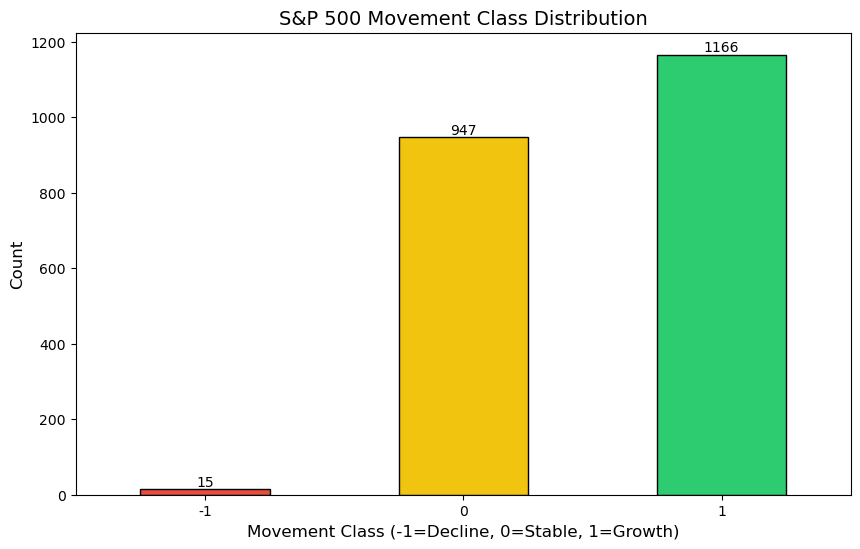

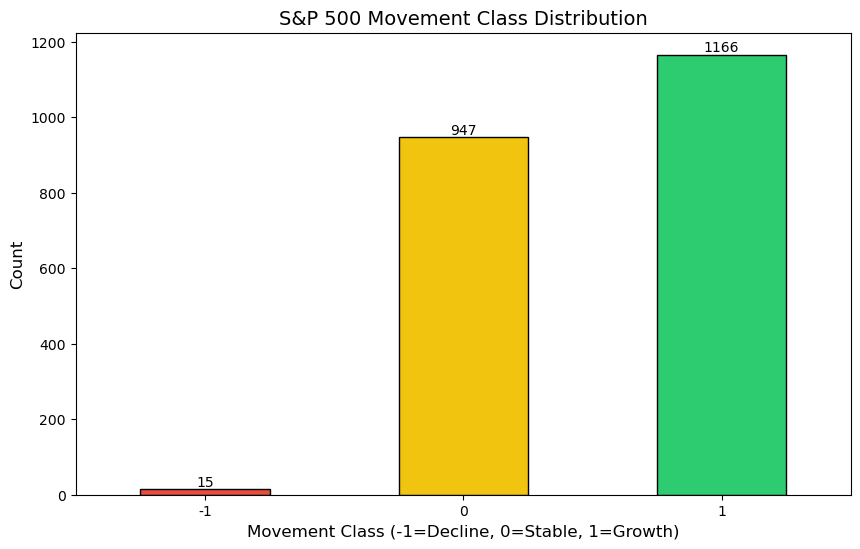

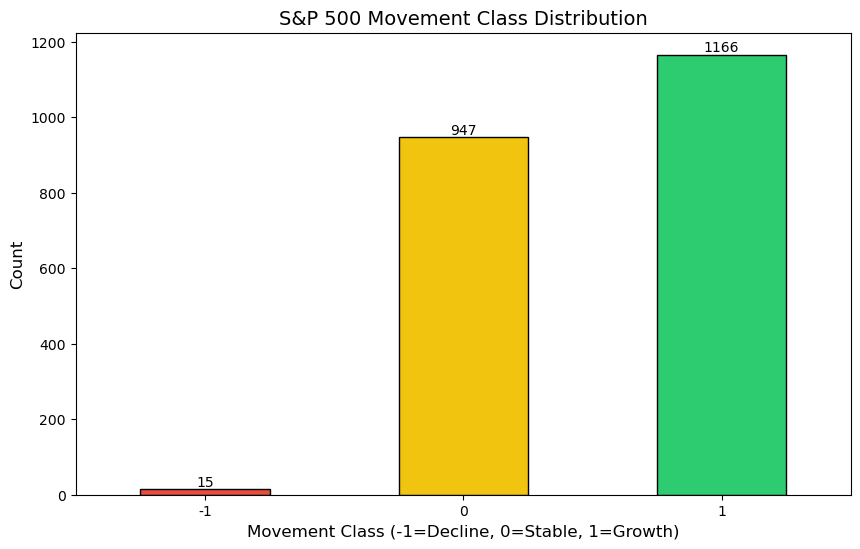

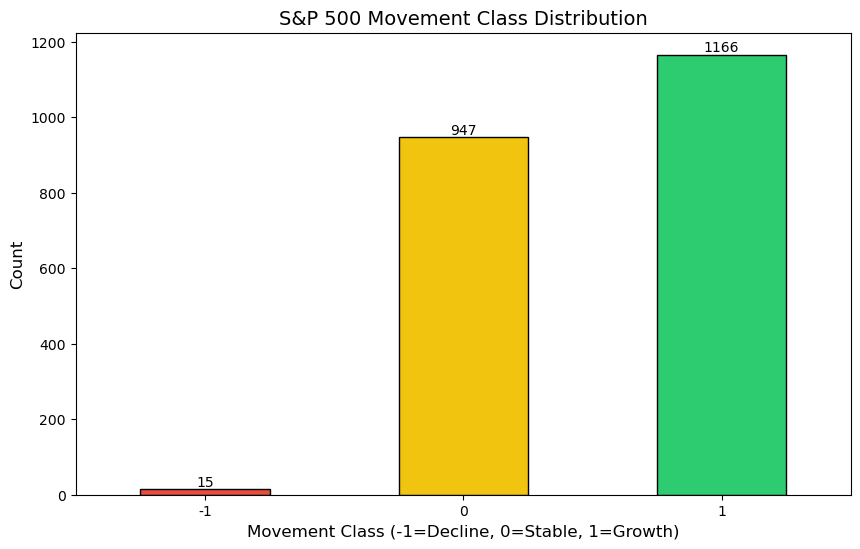

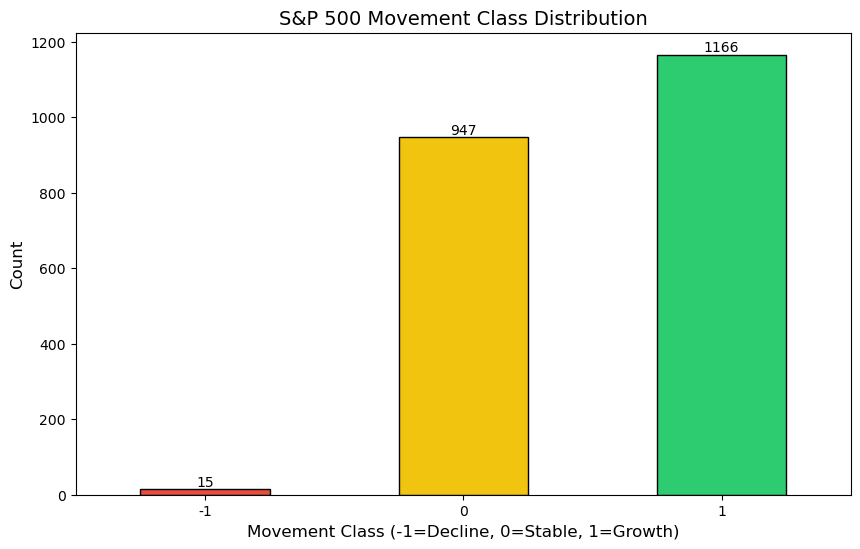

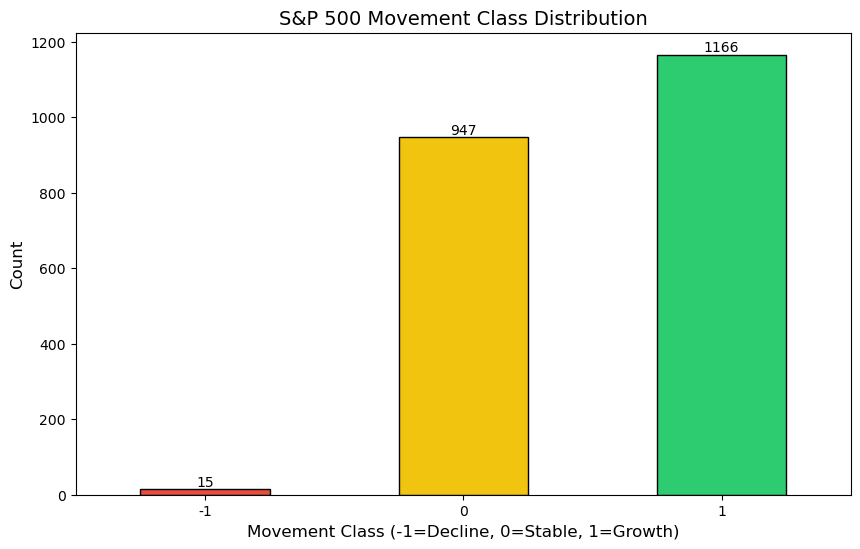

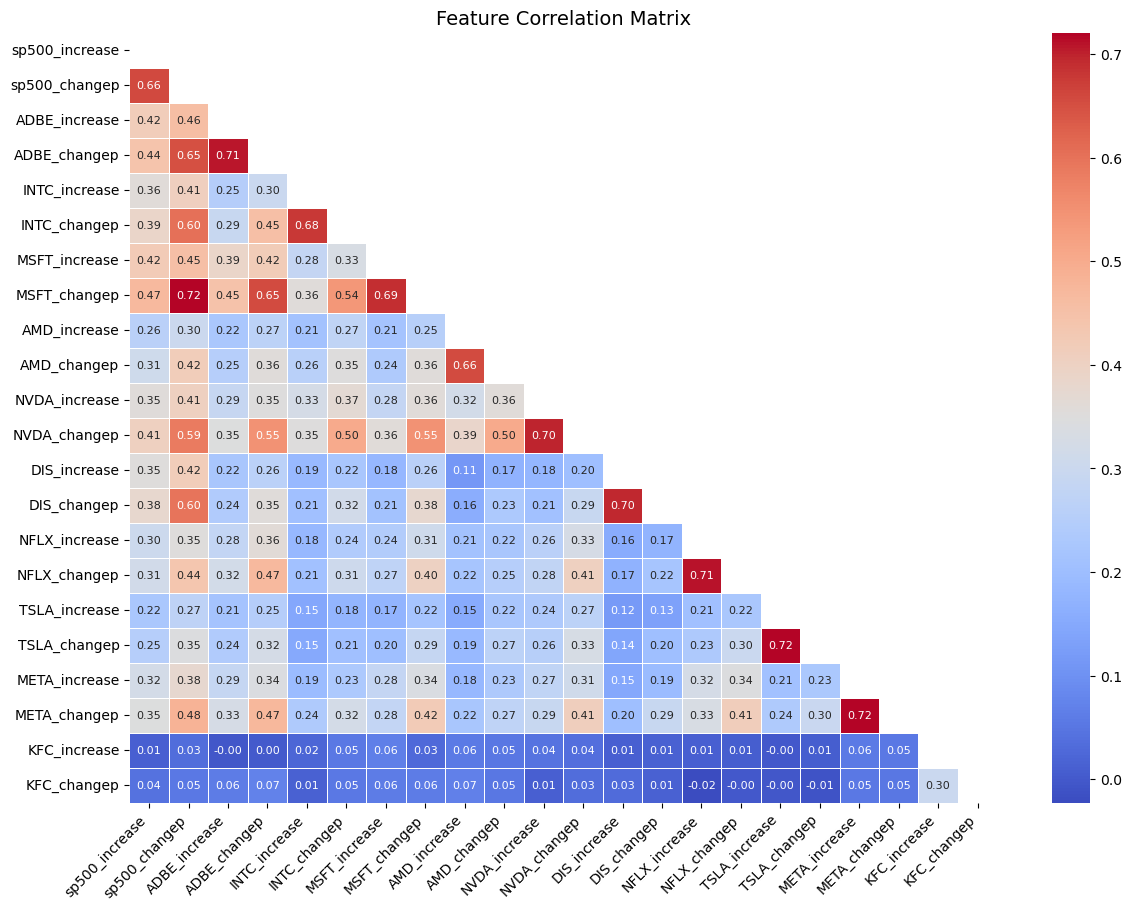


✅ Data preprocessing completed
Features shape: (2128, 10)
Target distribution:
sp500_increase
 1    0.547932
 0    0.445019
-1    0.007049
Name: proportion, dtype: float64

✅ Train-test split completed
Training set: 1702 samples
Test set: 426 samples

🚀 Starting grid search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=2, n_e

<Figure size 800x600 with 0 Axes>

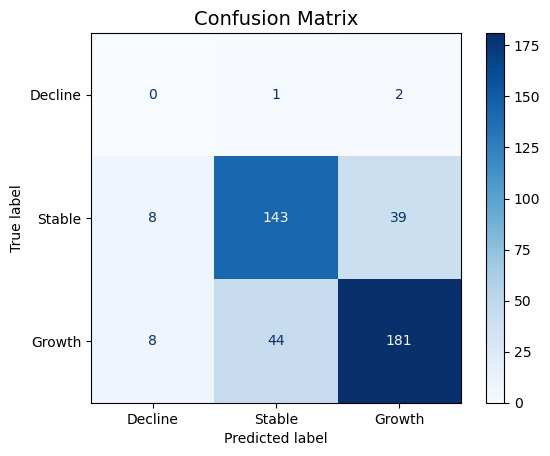

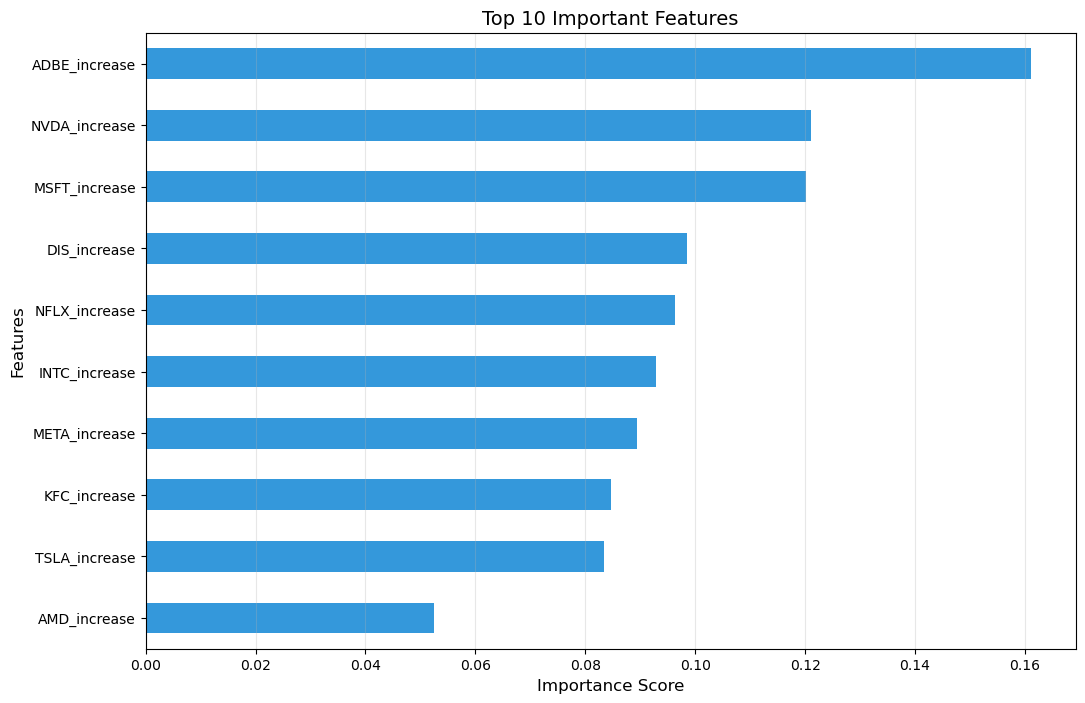


💾 Model artifacts saved successfully
Model path: /Users/ihorkorolov/PycharmProjects/machinelearning/models/sp500_model.pkl
Scaler path: /Users/ihorkorolov/PycharmProjects/machinelearning/models/scaler.pkl

🔧 Running unit tests...

✅ Model loading test passed

✅ Prediction test passed


In [20]:
# %% [markdown]
# # S&P 500 Index Movement Prediction
# ## Financial Market Analysis and Forecasting System

# %% [markdown]
# ### 0. Initial Setup
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# %% [markdown]
# ### 1. Configure Paths and Directories
# %%
try:
    # Set base directory
    BASE_DIR = pathlib.Path("/Users/ihorkorolov/PycharmProjects/machinelearning")
    
    # Define paths
    DATA_DIR = BASE_DIR / 'data'
    IMAGES_DIR = BASE_DIR / 'images'
    MODELS_DIR = BASE_DIR / 'models'
    
    # Create directories if not exist
    DATA_DIR.mkdir(parents=True, exist_ok=True)
    IMAGES_DIR.mkdir(parents=True, exist_ok=True)
    MODELS_DIR.mkdir(parents=True, exist_ok=True)
    
    print("🛠 Project structure configured:")
    print(f"Base directory: {BASE_DIR}")
    print(f"Data directory: {DATA_DIR}")
    print(f"Images directory: {IMAGES_DIR}")
    print(f"Models directory: {MODELS_DIR}\n")

except Exception as e:
    print(f"❌ Configuration error: {str(e)}")
    raise

# %% [markdown]
# ### 2. Load Dataset
# %%
try:
    data_path = DATA_DIR / 'sp500_stocks.csv'
    
    if not data_path.exists():
        print(f"🔍 Checking file at: {data_path}")
        raise FileNotFoundError("🚨 Data file not found! Verify:")
        print(f"1. File exists at: {data_path}")
        print(f"2. Correct file name and extension")
    
    df = pd.read_csv(data_path, parse_dates=['Date'])
    df = df.sort_values('Date').drop(columns=['Unnamed: 0'], errors='ignore')
    
    print("\n✅ Data loaded successfully")
    print(f"Dataset shape: {df.shape}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")

except Exception as e:
    print(f"\n❌ Data loading failed: {str(e)}")
    print("\n🔧 Troubleshooting steps:")
    print(f"mkdir -p {DATA_DIR}")
    print(f"mv /path/to/sp500_stocks.csv {DATA_DIR}/")
    raise

# %% [markdown]
# ### 3. Exploratory Data Analysis (EDA)

# %% [markdown]
# #### 3.1 Class Distribution
# %%
try:
    plt.figure(figsize=(10,6))
    ax = df['sp500_increase'].value_counts().sort_index().plot.bar(
        color=['#e74c3c', '#f1c40f', '#2ecc71'],
        edgecolor='black'
    )
    plt.title('S&P 500 Movement Class Distribution', fontsize=14)
    plt.xlabel('Movement Class (-1=Decline, 0=Stable, 1=Growth)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    ax.bar_label(ax.containers[0], label_type='edge')
    plt.savefig(IMAGES_DIR / 'class_distribution.png', bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"❌ Visualization error: {str(e)}")

# %% [markdown]
# #### 3.2 Correlation Analysis
# %%
try:
    plt.figure(figsize=(14,10))
    corr_matrix = df.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
                fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
    plt.title('Feature Correlation Matrix', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.savefig(IMAGES_DIR / 'correlation_matrix.png', bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"❌ Correlation analysis error: {str(e)}")

# %% [markdown]
# ### 4. Data Preprocessing
# %%
try:
    features = [
        'ADBE_increase', 'INTC_increase', 'MSFT_increase',
        'AMD_increase', 'NVDA_increase', 'DIS_increase',
        'NFLX_increase', 'TSLA_increase', 'META_increase',
        'KFC_increase'
    ]

    X = df[features]
    y = df['sp500_increase']

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print("\n✅ Data preprocessing completed")
    print(f"Features shape: {X_scaled.shape}")
    print(f"Target distribution:\n{y.value_counts(normalize=True)}")

except Exception as e:
    print(f"\n❌ Preprocessing error: {str(e)}")
    raise

# %% [markdown]
# ### 5. Model Training

# %% [markdown]
# #### 5.1 Train-Test Split
# %%
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    print("\n✅ Train-test split completed")
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

except Exception as e:
    print(f"\n❌ Data splitting error: {str(e)}")
    raise

# %% [markdown]
# #### 5.2 Hyperparameter Tuning
# %%
try:
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'max_features': ['sqrt', 'log2']
    }

    rf = RandomForestClassifier(
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2
    )
    
    print("\n🚀 Starting grid search...")
    grid_search.fit(X_train, y_train)
    
    print("\n✅ Hyperparameter tuning completed")

except Exception as e:
    print(f"\n❌ Model training error: {str(e)}")
    raise

# %% [markdown]
# #### 5.3 Best Model Selection
# %%
try:
    best_model = grid_search.best_estimator_
    print("\n🔥 Best Model Parameters:")
    print(grid_search.best_params_)
    print("\n📊 Best Model Score:")
    print(f"Validation Accuracy: {grid_search.best_score_:.4f}")

except Exception as e:
    print(f"\n❌ Model selection error: {str(e)}")
    raise

# %% [markdown]
# ### 6. Model Evaluation

# %% [markdown]
# #### 6.1 Classification Report
# %%
try:
    y_pred = best_model.predict(X_test)
    print("\n📊 Classification Performance:")
    print(classification_report(y_test, y_pred, 
                               target_names=['Decline', 'Stable', 'Growth']))

except Exception as e:
    print(f"\n❌ Evaluation error: {str(e)}")

# %% [markdown]
# #### 6.2 Confusion Matrix
# %%
try:
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, 
        display_labels=['Decline', 'Stable', 'Growth'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix', fontsize=14)
    plt.savefig(IMAGES_DIR / 'confusion_matrix.png', 
               bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"\n❌ Confusion matrix error: {str(e)}")

# %% [markdown]
# #### 6.3 Feature Importance
# %%
try:
    plt.figure(figsize=(12,8))
    feature_importance = pd.Series(best_model.feature_importances_, 
                                  index=features)
    feature_importance.nlargest(10).sort_values().plot(
        kind='barh', 
        color='#3498db'
    )
    plt.title('Top 10 Important Features', fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.savefig(IMAGES_DIR / 'feature_importance.png', 
               bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"\n❌ Feature importance error: {str(e)}")

# %% [markdown]
# ### 7. Model Deployment
# %%
try:
    model_path = MODELS_DIR / 'sp500_model.pkl'
    scaler_path = MODELS_DIR / 'scaler.pkl'
    
    joblib.dump(best_model, model_path)
    joblib.dump(scaler, scaler_path)
    
    print("\n💾 Model artifacts saved successfully")
    print(f"Model path: {model_path}")
    print(f"Scaler path: {scaler_path}")

except Exception as e:
    print(f"\n❌ Model saving error: {str(e)}")
    raise

# %% [markdown]
# ### 8. Unit Tests
# %%
def test_model_loading():
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        assert model is not None and scaler is not None
        print("\n✅ Model loading test passed")
    except Exception as e:
        print(f"\n❌ Model loading test failed: {str(e)}")

def test_prediction():
    sample_data = {feature: 0.0 for feature in features}
    sample_data['NVDA_increase'] = 0.05
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        scaled_data = scaler.transform(pd.DataFrame([sample_data]))
        prediction = model.predict(scaled_data)
        assert prediction[0] in [-1, 0, 1]
        print("\n✅ Prediction test passed")
    except Exception as e:
        print(f"\n❌ Prediction test failed: {str(e)}")

# Run tests
print("\n🔧 Running unit tests...")
test_model_loading()
test_prediction()


Project structure configured:
Base directory: /Users/ihorkorolov/PycharmProjects/machinelearning
Data directory: /Users/ihorkorolov/PycharmProjects/machinelearning/data
Images directory: /Users/ihorkorolov/PycharmProjects/machinelearning/images
Models directory: /Users/ihorkorolov/PycharmProjects/machinelearning/models

Data loaded successfully
Dataset shape: (2128, 23)
Date range: 2012-05-18 to 2021-04-19


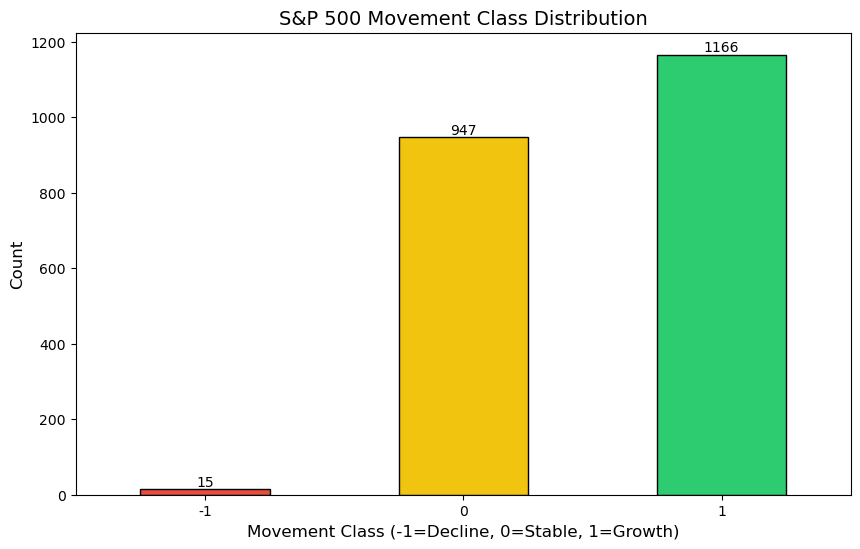

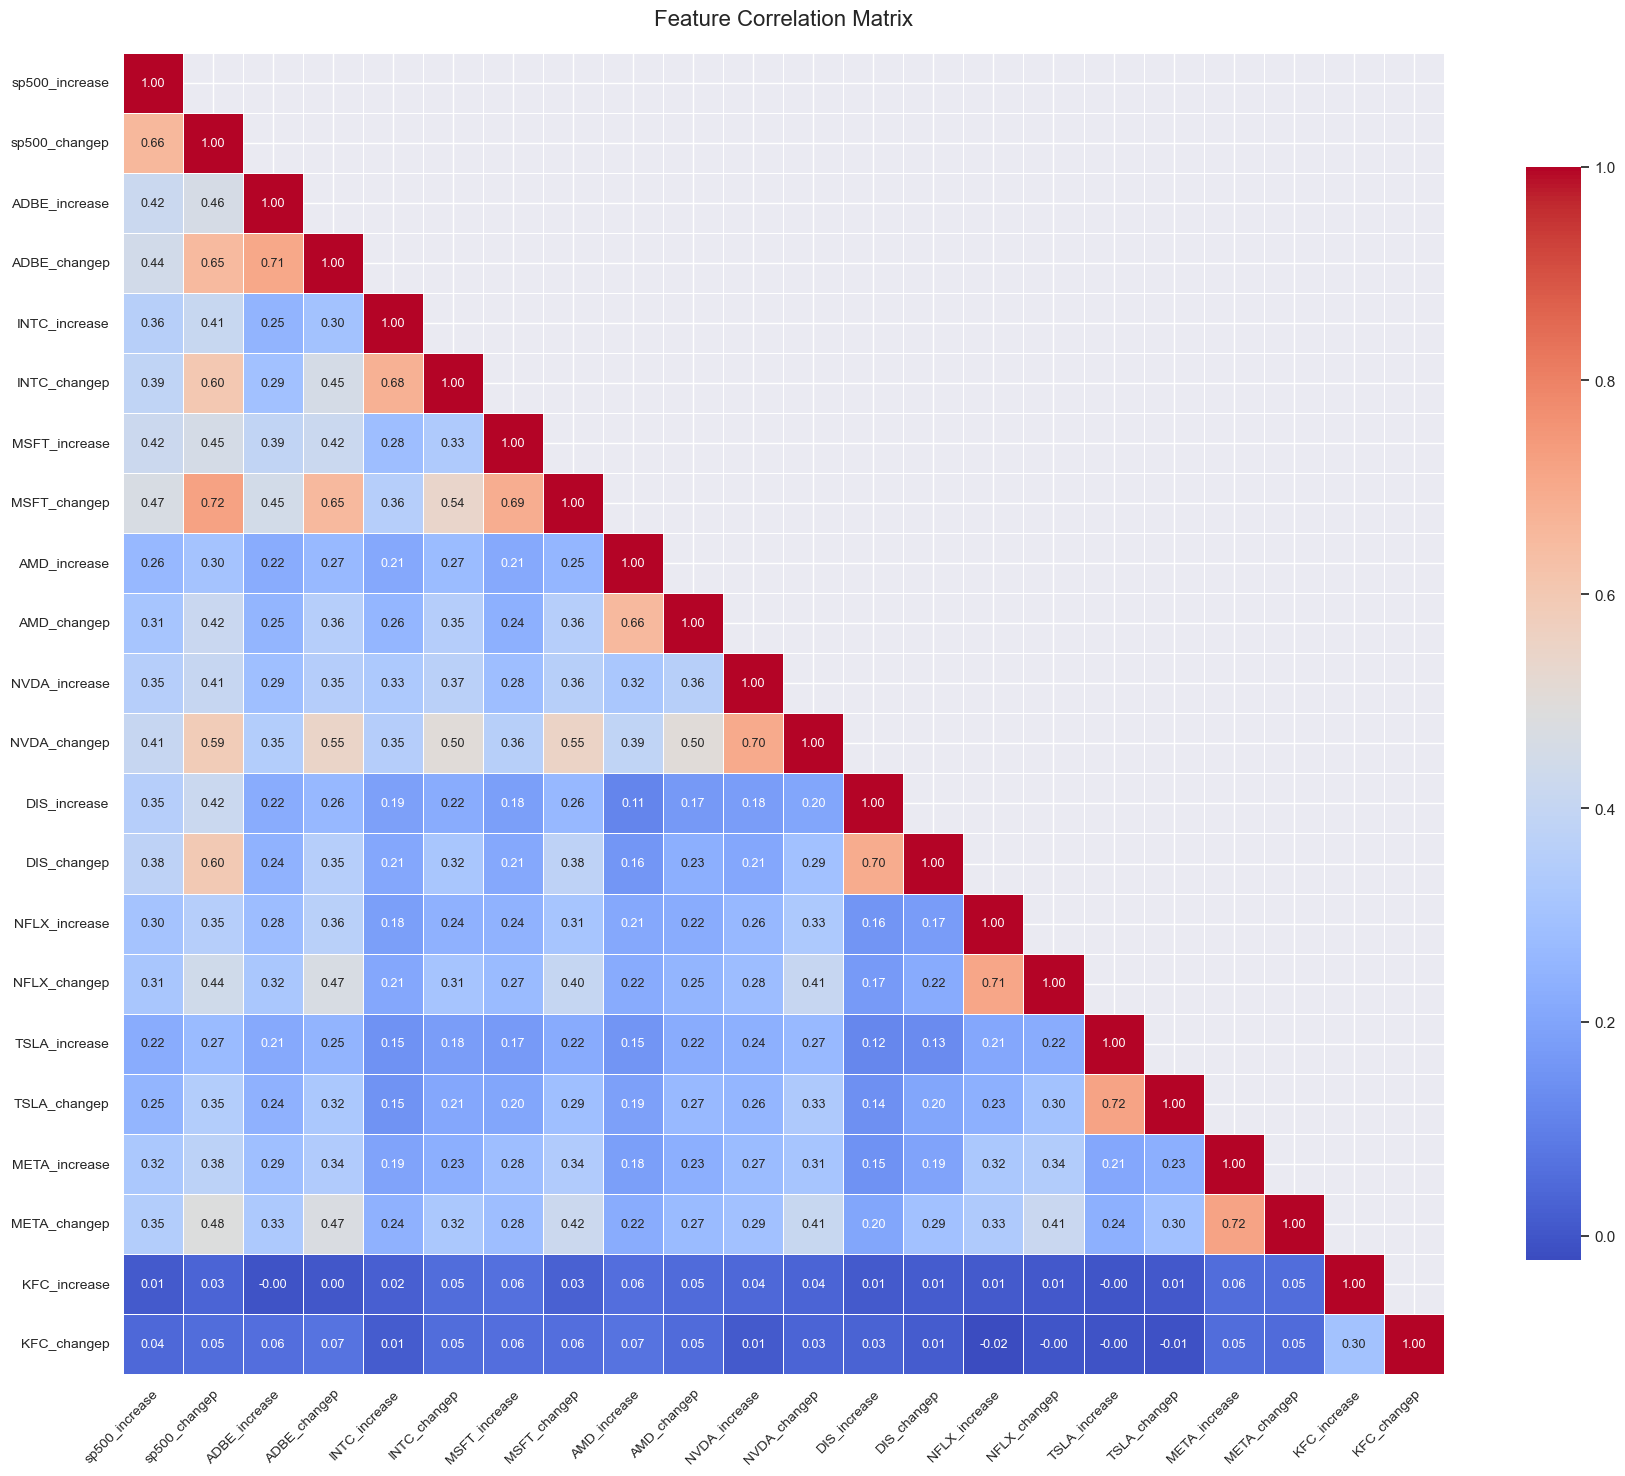


Data preprocessing completed
Features shape: (2128, 10)

Train-test split completed
Training set: 1702 samples
Test set: 426 samples

Starting grid search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Hyperparameter tuning completed

Best Model Parameters:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}

Best Model Validation Accuracy:
0.7761

Classification Performance:
              precision    recall  f1-score   support

     Decline       0.00      0.00      0.00         3
      Stable       0.76      0.75      0.76       190
      Growth       0.82      0.78      0.80       233

    accuracy                           0.76       426
   macro avg       0.53      0.51      0.52       426
weighted avg       0.79      0.76      0.77       426



<Figure size 800x600 with 0 Axes>

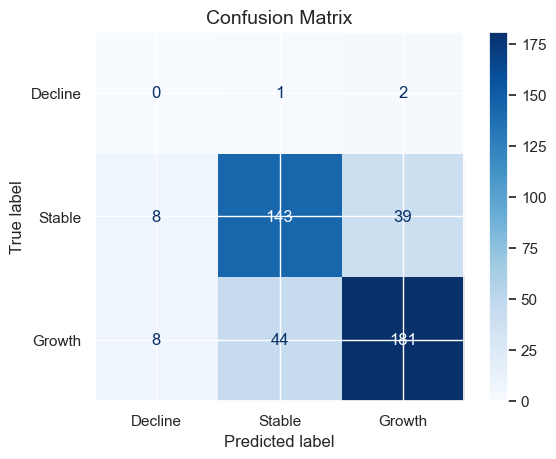

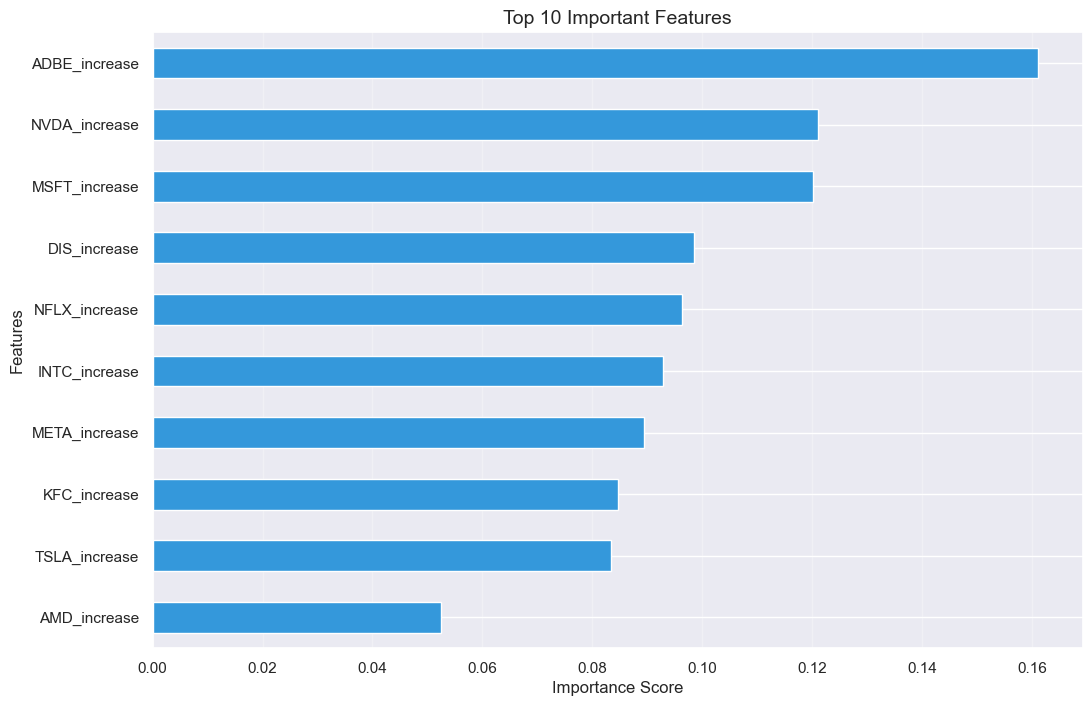


Model artifacts saved successfully
Model path: /Users/ihorkorolov/PycharmProjects/machinelearning/models/sp500_model.pkl
Scaler path: /Users/ihorkorolov/PycharmProjects/machinelearning/models/scaler.pkl

Running unit tests...

Model loading test passed

Prediction test passed


In [22]:
# %% [markdown]
# # S&P 500 Index Movement Prediction
# ## Financial Market Analysis and Forecasting System

# %% [markdown]
# ### 1. Initial Setup
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# %% [markdown]
# ### 2. Configure Paths and Directories
# %%
try:
    BASE_DIR = pathlib.Path("/Users/ihorkorolov/PycharmProjects/machinelearning")
    DATA_DIR = BASE_DIR / 'data'
    IMAGES_DIR = BASE_DIR / 'images'
    MODELS_DIR = BASE_DIR / 'models'

    DATA_DIR.mkdir(parents=True, exist_ok=True)
    IMAGES_DIR.mkdir(parents=True, exist_ok=True)
    MODELS_DIR.mkdir(parents=True, exist_ok=True)

    print("Project structure configured:")
    print(f"Base directory: {BASE_DIR}")
    print(f"Data directory: {DATA_DIR}")
    print(f"Images directory: {IMAGES_DIR}")
    print(f"Models directory: {MODELS_DIR}")

except Exception as e:
    print(f"Configuration error: {str(e)}")
    raise

# %% [markdown]
# ### 3. Load Dataset
# %%
try:
    data_path = DATA_DIR / 'sp500_stocks.csv'
    
    if not data_path.exists():
        raise FileNotFoundError(f"Data file not found at {data_path}")
    
    df = pd.read_csv(data_path, parse_dates=['Date'])
    df = df.sort_values('Date').drop(columns=['Unnamed: 0'], errors='ignore')
    
    print("\nData loaded successfully")
    print(f"Dataset shape: {df.shape}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")

except Exception as e:
    print(f"\nData loading failed: {str(e)}")
    print("\nTroubleshooting steps:")
    print(f"1. Ensure file exists at: {data_path}")
    print(f"2. Verify file permissions")
    raise

# %% [markdown]
# ### 4. Exploratory Data Analysis (EDA)

# %% [markdown]
# #### 4.1 Class Distribution
# %%
try:
    plt.figure(figsize=(10,6))
    ax = df['sp500_increase'].value_counts().sort_index().plot.bar(
        color=['#e74c3c', '#f1c40f', '#2ecc71'],
        edgecolor='black'
    )
    plt.title('S&P 500 Movement Class Distribution', fontsize=14)
    plt.xlabel('Movement Class (-1=Decline, 0=Stable, 1=Growth)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    ax.bar_label(ax.containers[0], label_type='edge')
    plt.savefig(IMAGES_DIR / 'class_distribution.png', bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"Visualization error: {str(e)}")

# %% [markdown]
# #### 4.2 Correlation Analysis (Improved)
# %%
try:
    plt.figure(figsize=(18, 15))
    corr_matrix = df.corr(numeric_only=True)
    
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask, k=1)] = True
    
    sns.set(font_scale=1.0)
    heatmap = sns.heatmap(
        corr_matrix,
        mask=mask,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=0.5,
        annot_kws={"size": 9, "ha": 'center', "va": 'center'},
        cbar_kws={"shrink": 0.8},
        square=True
    )
    
    plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)
    plt.yticks(fontsize=10, rotation=0)
    
    plt.tight_layout()
    plt.savefig(IMAGES_DIR / 'correlation_matrix.png', bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"Correlation analysis error: {str(e)}")

# %% [markdown]
# ### 5. Data Preprocessing
# %%
try:
    features = [
        'ADBE_increase', 'INTC_increase', 'MSFT_increase',
        'AMD_increase', 'NVDA_increase', 'DIS_increase',
        'NFLX_increase', 'TSLA_increase', 'META_increase',
        'KFC_increase'
    ]

    X = df[features]
    y = df['sp500_increase']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print("\nData preprocessing completed")
    print(f"Features shape: {X_scaled.shape}")

except Exception as e:
    print(f"\nPreprocessing error: {str(e)}")
    raise

# %% [markdown]
# ### 6. Model Training

# %% [markdown]
# #### 6.1 Train-Test Split
# %%
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    print("\nTrain-test split completed")
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

except Exception as e:
    print(f"\nData splitting error: {str(e)}")
    raise

# %% [markdown]
# #### 6.2 Hyperparameter Tuning
# %%
try:
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'max_features': ['sqrt', 'log2']
    }

    rf = RandomForestClassifier(
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    print("\nStarting grid search...")
    grid_search.fit(X_train, y_train)
    
    print("\nHyperparameter tuning completed")

except Exception as e:
    print(f"\nModel training error: {str(e)}")
    raise

# %% [markdown]
# #### 6.3 Best Model Selection
# %%
try:
    best_model = grid_search.best_estimator_
    print("\nBest Model Parameters:")
    print(grid_search.best_params_)
    print("\nBest Model Validation Accuracy:")
    print(f"{grid_search.best_score_:.4f}")

except Exception as e:
    print(f"\nModel selection error: {str(e)}")
    raise

# %% [markdown]
# ### 7. Model Evaluation

# %% [markdown]
# #### 7.1 Classification Report
# %%
try:
    y_pred = best_model.predict(X_test)
    print("\nClassification Performance:")
    print(classification_report(y_test, y_pred, 
                               target_names=['Decline', 'Stable', 'Growth']))

except Exception as e:
    print(f"\nEvaluation error: {str(e)}")

# %% [markdown]
# #### 7.2 Confusion Matrix
# %%
try:
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, 
        display_labels=['Decline', 'Stable', 'Growth'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix', fontsize=14)
    plt.savefig(IMAGES_DIR / 'confusion_matrix.png', 
               bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"\nConfusion matrix error: {str(e)}")

# %% [markdown]
# #### 7.3 Feature Importance
# %%
try:
    plt.figure(figsize=(12,8))
    feature_importance = pd.Series(best_model.feature_importances_, 
                                  index=features)
    feature_importance.nlargest(10).sort_values().plot(
        kind='barh', 
        color='#3498db'
    )
    plt.title('Top 10 Important Features', fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.savefig(IMAGES_DIR / 'feature_importance.png', 
               bbox_inches='tight', dpi=300)
    plt.show()

except Exception as e:
    print(f"\nFeature importance error: {str(e)}")

# %% [markdown]
# ### 8. Model Deployment
# %%
try:
    model_path = MODELS_DIR / 'sp500_model.pkl'
    scaler_path = MODELS_DIR / 'scaler.pkl'
    
    joblib.dump(best_model, model_path)
    joblib.dump(scaler, scaler_path)
    
    print("\nModel artifacts saved successfully")
    print(f"Model path: {model_path}")
    print(f"Scaler path: {scaler_path}")

except Exception as e:
    print(f"\nModel saving error: {str(e)}")
    raise

# %% [markdown]
# ### 9. Unit Tests
# %%
def test_model_loading():
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        assert model is not None and scaler is not None
        print("\nModel loading test passed")
    except Exception as e:
        print(f"\nModel loading test failed: {str(e)}")

def test_prediction():
    sample_data = {feature: 0.0 for feature in features}
    sample_data['NVDA_increase'] = 0.05
    try:
        model = joblib.load(MODELS_DIR / 'sp500_model.pkl')
        scaler = joblib.load(MODELS_DIR / 'scaler.pkl')
        scaled_data = scaler.transform(pd.DataFrame([sample_data]))
        prediction = model.predict(scaled_data)
        assert prediction[0] in [-1, 0, 1]
        print("\nPrediction test passed")
    except Exception as e:
        print(f"\nPrediction test failed: {str(e)}")

print("\nRunning unit tests...")
test_model_loading()
test_prediction()